#### 2. SVM Classification

Salvador Galarza, Abraham Hill

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
data_path = "OJ.csv"
df = pd.read_csv(data_path)

In [4]:
# How many samples are there in the training set? 
rows, columns = df.shape
# How many features?
print("The data has {} samples, and {} features.".format(rows, columns))

The data has 1070 samples, and 19 features.


In [5]:
df.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [6]:
import warnings
warnings.filterwarnings('ignore')

df.Purchase[df.Purchase == 'CH'] = 1
df.Purchase[df.Purchase == 'MM'] = 0

df.Store7[df.Store7 == 'Yes'] = 1
df.Store7[df.Store7 == 'No'] = 0

In [7]:
df.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


##### part a

In [8]:
## Split the training data into a training (80%) and test set (20%).
# df_selected = df_train[selected_features]
x = df.drop(['Purchase'],axis = 1)
y = df.Purchase.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.252, random_state=4)

In [9]:
x_train.shape

(800, 18)

##### part b

In [10]:
# clf = make_pipeline(StandardScaler(), SVC(C=.01, gamma='auto'))
# clf.fit(x_train, y_train)

clf = SVC(C=.01, gamma='auto')
clf.fit(x_train, y_train)

# svm = svm.SVC(kernel='linear')

# svm.fit(features, labels)
# svm.coef_

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# clf.support_vectors_
# clf.dual_coef_
# clf.feature_names_in_

Describe the classifier. What are the learned coefficients? (You can use sklearn to help with this.)

...

##### part c

In [12]:
clf.score(x_train, y_train)

0.6025

In [13]:
clf.score(x_test,y_test)

0.6333333333333333

##### part d

In [14]:
# Cs = list(np.arange(.01, 10, .5))
Cs = list(np.arange(.01, .1, .01))

scores = []
for c in Cs:
    cv_clf = SVC(kernel='linear', C=c, random_state=42)
    scores.append(np.mean(cross_val_score(cv_clf, x_train, y_train, cv=5)))
    
scores

[0.7375,
 0.76625,
 0.7925,
 0.8175000000000001,
 0.81875,
 0.82,
 0.82125,
 0.8175000000000001,
 0.81875]

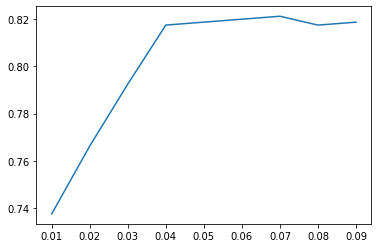

In [15]:
plt.plot(Cs, scores)

The best C is 0.07

##### part e

In [16]:
cv_clf = SVC(kernel='linear', C=.07, random_state=42)
cross_val_score(cv_clf, x_train, y_train, cv=5)

array([0.7875 , 0.80625, 0.84375, 0.86875, 0.8    ])

In [17]:
cv_clf.fit(x_train, y_train)

SVC(C=0.07, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
cv_clf.score(x_train, y_train)

0.825

In [19]:
cv_clf.score(x_test,y_test)

0.8037037037037037

##### part f

For a support vector classifier with a radial bassis function (RBF) kernel we should consider a smaller γ value as corresponding to a simpler model because as this parameter decreases so does our variance. Which is directly associatd with overfitting and a more complex model.

##### part g

Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use crossvalidation (with the one-standard-error rule) to select an appropriate gamma .

In [20]:
clf = SVC(C=.01, gamma='auto', kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
clf.score(x_train, y_train)

0.6025

In [22]:
clf.score(x_test,y_test)

0.6333333333333333

In [23]:
Cs = list(np.arange(.01, .1, .01))

scores = []
for c in Cs:
    cv_clf = SVC(kernel='rbf', C=c, random_state=42)
    scores.append(np.mean(cross_val_score(cv_clf, x_train, y_train, cv=5)))
    
scores

[0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025]

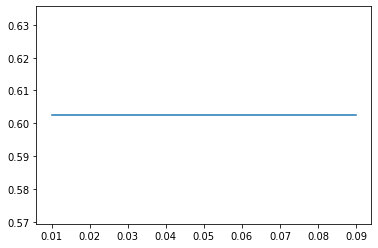

In [24]:
plt.plot(Cs, scores)

All C values result in the same score.

In [25]:
cv_clf = SVC(kernel='rbf', C=.07, random_state=42)
cross_val_score(cv_clf, x_train, y_train, cv=5)

array([0.6    , 0.6    , 0.6    , 0.60625, 0.60625])

In [26]:
cv_clf.fit(x_train, y_train)

SVC(C=0.07, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
cv_clf.score(x_train, y_train)

0.6025

In [28]:
cv_clf.score(x_test,y_test)

0.6333333333333333

##### part h

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set
degree=2 and use cross validation again to choose an appropriate gamma.

In [29]:
clf = SVC(C=.01, kernel='poly', degree=2)
clf.fit(x_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
clf.score(x_train, y_train)

0.6025

In [31]:
clf.score(x_test,y_test)

0.6333333333333333

In [32]:
Cs = list(np.arange(.01, .1, .01))

scores = []
for c in Cs:
    cv_clf = SVC(kernel='poly', C=c, random_state=42)
    scores.append(np.mean(cross_val_score(cv_clf, x_train, y_train, cv=5)))
    
scores

[0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025, 0.6025]

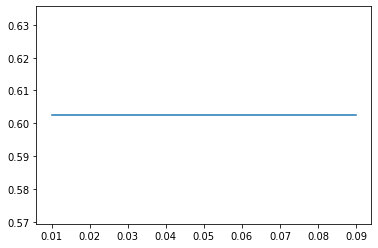

In [33]:
plt.plot(Cs, scores)

In [34]:
cv_clf = SVC(kernel='poly', C=.07, random_state=42)
cross_val_score(cv_clf, x_train, y_train, cv=5)

array([0.6    , 0.6    , 0.6    , 0.60625, 0.60625])

In [35]:
cv_clf.fit(x_train, y_train)

SVC(C=0.07, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
cv_clf.score(x_train, y_train)

0.6025

In [37]:
cv_clf.score(x_test,y_test)

0.6333333333333333

##### part i

i. Overall, which approach seems to give the best results on this data?

The linear kernel gives the best result on this data with a validation score of 80.37%